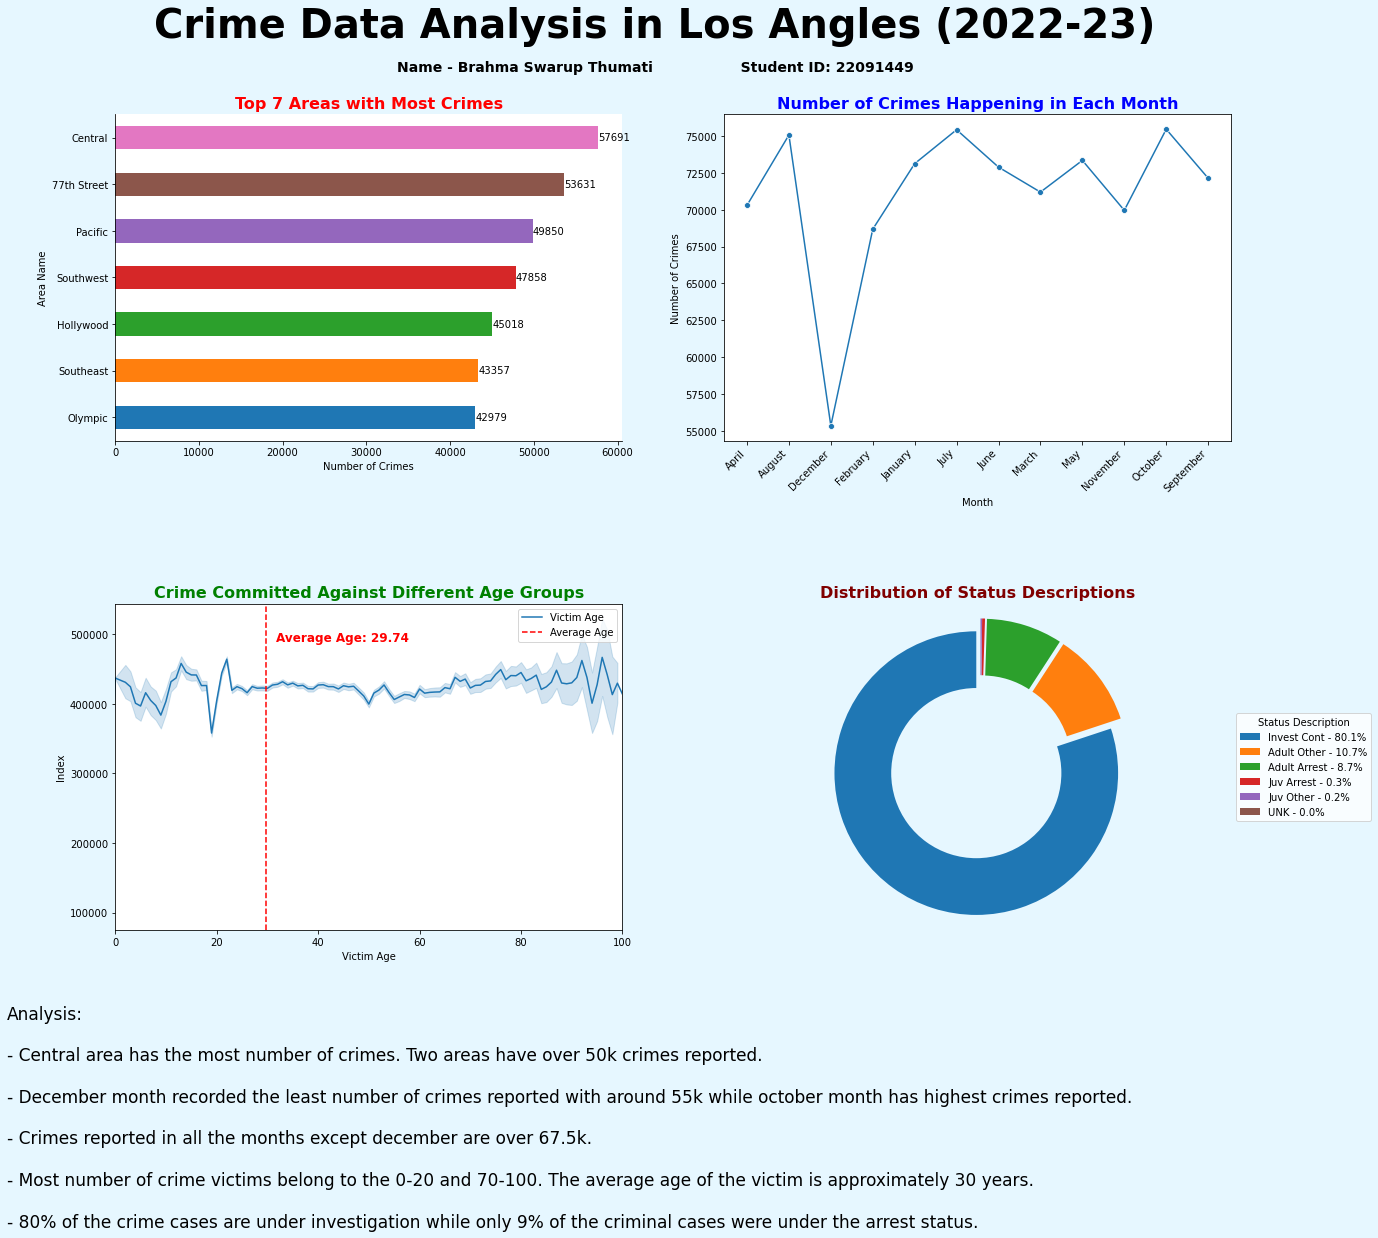

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df = df.dropna(axis=1)
df['date_occurred'] = pd.to_datetime(df['date_occurred'])
df['month_name'] = df['date_occurred'].dt.strftime('%B')

# Top 7 Areas with Most Crimes
plt.figure(figsize=(20, 15), facecolor='#E6F7FF')
bar_colors = plt.cm.tab10(range(len(df['area_name'].value_counts().head(7))))
plt.subplot(2, 2, 1)
top_areas = df['area_name'].value_counts().head(7).sort_values(ascending=True)
bars = top_areas.plot(kind='barh', color=bar_colors, edgecolor='none')
for index, value in enumerate(top_areas):
    plt.text(value, index, str(value), va='center', fontsize=10)
plt.title('Top 7 Areas with Most Crimes', fontsize=16, color='red', fontweight='bold')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Number of Crimes Happening in Each Month
plt.subplot(2, 2, 2)
crimes_by_month = df.groupby('month_name').size()
sns.lineplot(x=crimes_by_month.index, y=crimes_by_month.values, marker='o')
plt.title('Number of Crimes Happening in Each Month', fontsize=16, color='blue', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')

plt.subplots_adjust(hspace=0.5)

# Crime Committed Against Different Age Groups
plt.subplot(2, 2, 3)
sns.lineplot(x=df['victim_age'], y=df.index, label='Victim Age')
average_age = df['victim_age'].mean()
plt.axvline(x=average_age, color='red', linestyle='--', label='Average Age')
plt.xlim(0, 100)
plt.title('Crime Committed Against Different Age Groups', fontsize=16, color='green', fontweight='bold')
plt.xlabel('Victim Age')
plt.ylabel('Index')
plt.legend()
plt.text(average_age + 2, plt.ylim()[1] * 0.9, f'Average Age: {average_age:.2f}', color='red', fontsize=12, fontweight='bold')

# Distribution of Status Descriptions
plt.subplot(2, 2, 4)
status_counts = df['status_description'].value_counts()
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
wedges, _, _ = plt.pie(status_counts, autopct='', startangle=90, explode=explode, wedgeprops=dict(width=0.4))
centre_circle = plt.Circle((0, 0), 0.50, fc='#E6F7FF')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
legend_labels = [f'{label} - {percentage:.1f}%' for label, percentage in zip(status_counts.index, (status_counts / status_counts.sum()) * 100)]
plt.legend(legend_labels, title='Status Description', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Status Descriptions', fontsize=16, color='maroon', fontweight='bold')

fig.suptitle('Crime Data Analysis in Los Angles (2022-23)', fontsize=40, color='black', fontweight='bold')
plt.figtext(0.5, 0.92, 'Name - Brahma Swarup Thumati                  Student ID: 22091449',
            ha='center', fontsize=14, color='black', fontweight='bold')


text = """Analysis:

- Central area has the most number of crimes. Two areas have over 50k crimes reported.

- December month recorded the least number of crimes reported with around 55k while october month has highest crimes reported.

- Crimes reported in all the months except december are over 67.5k.

- Most number of crime victims belong to the 0-20 and 70-100. The average age of the victim is approximately 30 years.

- 80% of the crime cases are under investigation while only 9% of the criminal cases were under the arrest status."""

fig.text(0.05, -0.15, text, fontsize=17, va='baseline')
plt.show()